# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
- No, the smartcab doesn't move at all during the simulation.
- The driving agent recives positive rewards (positive numbers) when staying idle at the red lights and negative rewards otherwise (the agent stays idle also when the signal is green with no oncoming traffic). The driving agent doesn't move or take any action currently.
- The green text means a positive rewards (good actions) and the red text means a negative rewards (bad actions).

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**The flags in "agent.py" are the following:**
 - learning: it's a boolean variable and we can set it to "True" to force the driving agent to use Q-learning, otherwise the driving agent won't learn from its behavior.
 - epsilon: is the random exploration factor and it represents the probability by which the driving agent will take a random action (explore the environment randomly). Its value between 0 and 1 (epsilon >= 0 and <=1).
 - update_delay: continuous time (in seconds) between actions to update, default is 2.0 seconds. Reducing this value, we will accelerate the simulation speed.
 - display: set to False to disable the GUI if PyGame is enabled (display the PyGame window or not)
 - log_metrics: set to True to log trial and simulation results to /logs
 - optimized: set to True to change the default log file name to be "improved" version.
 
**Environment class function is called when an agent performs an action is "act" function and here is the function'signature "def act(self, agent, action):". This function takes in its input arguments the driving agent as an object and the action needs to be taken.**

'render_text()': This function will log or render the simulated trials' data in the comand prompt or the terminal. so it is the non-GUI version of the render display of the simulation data and it just logs or renders text.

'render()': This function will render the visual simluation to the pyGame window (the GUI simulation window).So this function is the GUI render display of the simulation process itself.  

'next_waypoint() function will consider the East-West direction first, after that it checks the the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


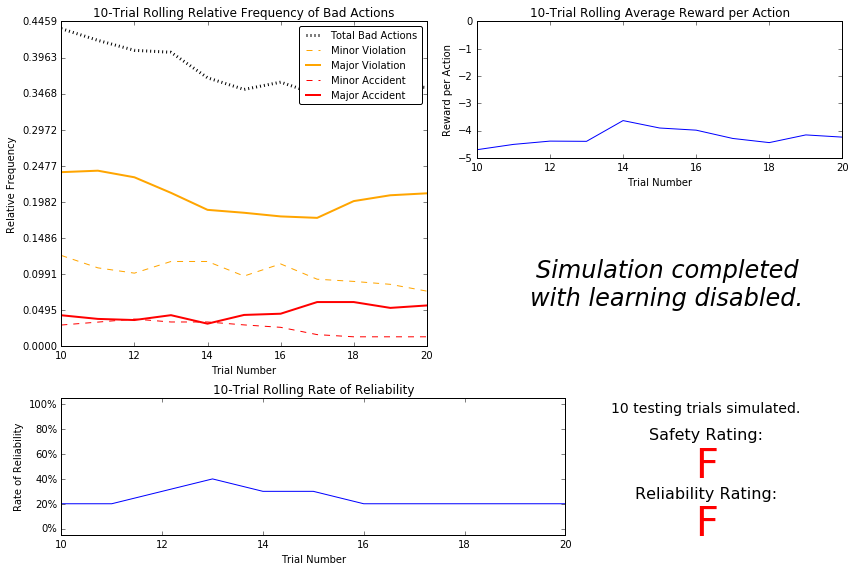

In [81]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Form the visulaization above, the driving agent made bad decisions about 45% of the time (approximately on average) and about 25% or a little more of those bad decisions caused accidents (either major or minor accidents).

Reffering to the visulaization and given that the agent is driving randomly, the rate of reliability is about less than 20% and its grade or rate is "F", also we can notice that only four trials successful (the agent reached the destination on time) out of 20 training trials, so the agent failed to reach the detination on time about 80% percent of the time. Based on that, low rate of the reliability makes sense in that context.

The average rewards per action for the training trials show that the agent is penalized heavily for its bad decisions. The agent receives both positive rewards and negative rewards, but the agent receives negative rewards with high values, so the average or even the total rewards will be negative.

As the number of the trials increase we can notice that the outcome of results doesn't change signficantly.

As a conclusion, this smartcab is unsafe and unreliable because it does not learn and it takes actions randomly, so the end result is high rate of the bad actions and high rate of accidents, moreover the agent fails to reach destination on time more that 80% of the time.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The most relevant features are waypoint and inputs {light, left, right, oncoming}, these features are appropriate for modeling the Smartcab in the environment becuase "inputs" will make the agent knowing the conditions around in the environment at the moment of taking the next action, and the "waypoint" will guide the agent to plan the next waypoint based on the current heading and the intended destination. Knowing these data, the agent can learn how to reach the destination safely and efficiently.

I didn't choose "deadline", I think this feature is not appropriate for two reasons, the first one is we don't want to the agent to compromise or violate the traffic rules due to the deadline, but we can learn the agent to reach the destination safely as early as possible following the traffic rules. Based on that we can drop out the "deadline" feature from the state without affecting the main objective of enabling the agent to learn how to drive safely and efficiently. The second reason to drop this feature is to reduce the state space. Having this feature specifically in our state will expand the state space and making the learning process infeasible.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Based on the selected features from Question 4 (waypoint and inputs), the size of the state space could be calculated as the following: 
   - waypoint feature has three possible values {left, right, forward}.
   - inputs has left, right and oncoming with four possible values for each and light with two possible values. (4 x 4 x 4 x 2)

Based on that, the size of the state space is (3 x 4 x 4 x 4 x 2) = 384.

Yes, the driving agent could learn a policy for each possible state within a reasonable number of training trials. Given the state space and the possible actions (4 actions), the agent can visit each state-action pair few times during a reasonable number of training trials. The total number of the state-action pairs in this case will be (state space size x number of possible actions) = 384 x 4 =  1536 pairs.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

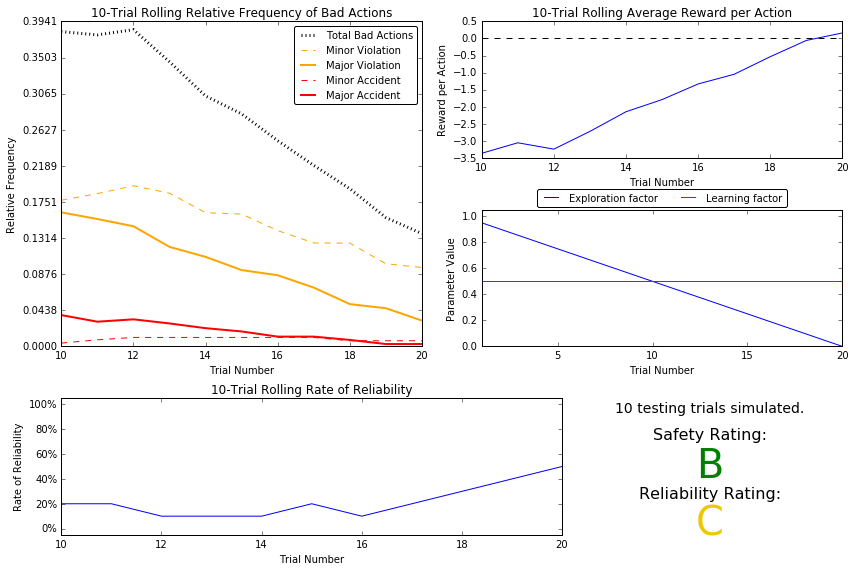

In [70]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

As shown form the visulaization above, the driving agent started to learn using a linear exploration factor (epsilon) and default value for the learning factor (alpha = 0.5). Due to the linear decyaing function for the exploration, the agent went through 20 training trials only before starting the testing trials, that is why the driving agent didn't have the opportunity to visit as many state-action pairs as possible, so we got this rating for safety (B) and reliability (C). Surely the number of training trails makes sense given the defualt epislon tolerance (0.05) used for the default learning.

As the number of trails increase, the bad actions decrease and the driving agent be more safe by taking more informant decisions. Also the average reward increase. The decaying function used for the exploration factor (epsilon) is well represented in the reset function, so at the begining of each training trial we have a new value for epsilon  generated from the decyaing function (ϵ(t+1) = ϵ(t) − 0.05,for trial number t).

The main difference between the initial driving agent and the default Q-learning agent is the initial agent just takes a random actions without learning from its behavior during the same number of the 20 training trials, that is why it's not safe (safety rating is "F") and it's not reliable as well (reliability rating is "F"), contrary the default Q-learning agent is learning from its past and its behavior and buidling the Q-table that has the Q-values of the state-action pairs, so by more training trails, the default agent is able to enhance its actions and reach the destination in a proper way by following the traffic rules.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

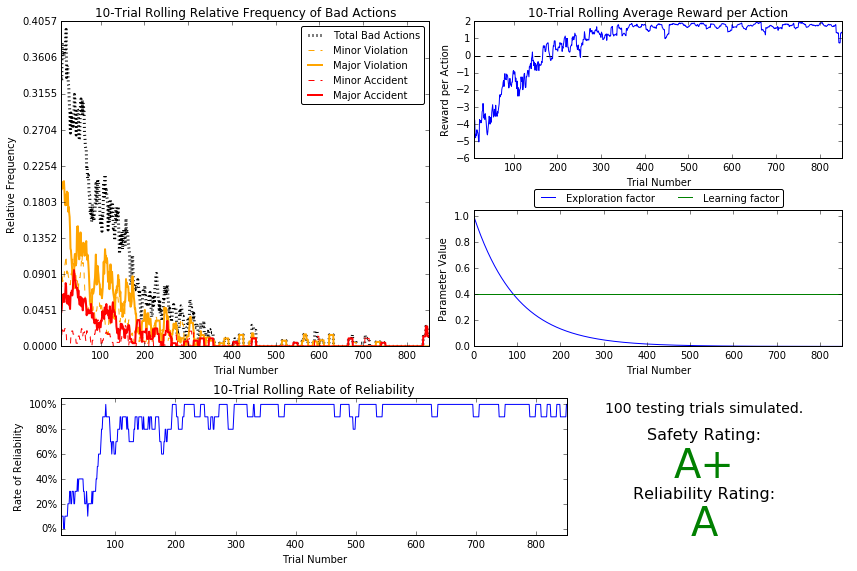

In [80]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

For the optimal version of the driving agent, the agent is able to learn amost the optimal policy. After many training trails (about 850 training trials) using the new exponential decaying function, the agent was able to get safety rating of "A+" and a reliability rating of "A" in a consecutive 100 testing trials.

   - The decaying function used for epsilon is (ϵ=e^−at ,for 0<a<1), where a=0.01
   - The number of training trials were needed for the agent before begining tesing was approximately 850 trials.
   - epsilon-tolerance was 0.0002 and alpha (learning rate) was 0.4 to allow the driving agent go through more training trials, which in turn allow the agent to visit all the state-action pairs and update their Q-values in the Q-table. I have chosen to decrease the learning factor to be 0.4 to slow down the learning process a little, and also this number is the learning factor that gave me the best results after many trials.
   - There is a big improvement with this optimized version compared to the default Q-learner, this is appearent from the safety and reliability ratings "A+ and A" subsequently.
   - Yes, the Q-learner results show that the agent is learning. During the testing, It was able to drive completely safe to the destination and it was able also to reach on time over 90% of the trips.
   - I'm satified with these results in terms of safety and reliability, however I believe there is a room to improve the results by the following tactics:
        - Trying to reduce the state space for the smartCab, one of the ideas for this is to remove the "right" variable from the inputs. In this case the size of the state space will be reduced to be 96 and the state will be represented by "waypoint, light, oncoming, left" only.
        - Also keeping the exploration factor's (epsilon) value high, so the agent will explore a lot during the training trials. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1- The optimal policy for the smartcab is to drive safely to reach out the destination on time with obeying the traffic rules and laws. The best set of instructions possible could be summarized as the following:
  - The samrtcab can drive forward when the light is green.
  - The smartcab can drive left when the light is green.
  - The smartcab must stop at the red light, although the smartcab can turn right when the light is red if there is no traffic coming from the left.
  - Also smartcab can turn right when the light is green.
   
Generally the optimal policy in the Q-learning setup is the best action could be taken at a given state, and it will be represented in the Q-table by the action that has the maximum Q-value for each state. 
   
2- After investigating 'sim_improved-learning.txt' text file to see the results of the improved Q-Learning algorithm, the agent has learned the optimal policy and almost for each state, we have the right sub-optimal policy represneted by the action with the highest Q-value. I believe there are some few cases where the policy for a state is different from the what would be expected from the optimal policy.

3- Given the state is represented in the following format <waypoint, light, oncoming, left, right>, here is the following are exmaples of the Q-table file that demonestrate the agent has learned the optimal policy:
  
  1 - ('right', 'green', 'forward', None, 'forward')
  
   -- forward : 0.00
   
   -- right : 2.16
   
   -- None : -1.67
   
   -- left : -0.03
   
   Here we can notice that the waypoint is "right", the light is green, the oncoming traffic is going forward, and there is no traffic coming form the left, so the optimal policy in that state for the agent is to go right safely, and this is what we have, because the right action has the highest Q-value as shown in above.
   
   2 - ('right', 'red', 'left', 'forward', 'left')
     
     -- forward : -16.34
     
     -- right : -7.73
     
     -- None : 1.25
     
     -- left : 0.00
     
     Here we can notice that the best action with highest Q-value is "None" which means is to stop, and this is the optimal policy in this case, because the light is red and there is oncoming tarffic going left and there is also a traffic coming from the left.
     
    3 - ('right', 'red', 'right', None, None)
     
     -- forward : 0.00
     
     -- right : 1.94
     
     -- None : 0.57
     
     -- left : -16.19
     
     Here we can notice that the best action with highest Q-value is "right" which means is to turn right, and this is the optimal policy in this case, because the light is red and the oncoming tarffic is going right and there is no traffic at all from the left or the right sides.
     


4- I think the following state does not follow the optimal policy:

('left', 'red', None, 'left', 'forward')

 -- forward : -16.09
 
 -- right : 0.99
 
 -- None : 0.00
 
 -- left : -15.94
 
 Here the highest value is for "right" action, but the best action or the optimal policy in this state is to stop "None action", because the next waypoint is to turn left and if the agent went right, it will be farther away from the destination.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The future rewards won't work for this project for the following reasons:
   - The smartcab see the environment through the current state which represented by the waypoint and inputs information at this state, so the states are not linked to a specific location or intersection, so it doesn't make sense to consider distance between destination and any secific state, which in turn means that we can't propagate future rewards from the destination towards specific states, becuase the smartcab doesn't know how much specific intersection or state far away from the destination. (This is the reason related to the smartcab)
    
    
   - The environment is always changing and so the destination is not fixed, which means that the destination is changing with each learning trial. (This is reason related to the environment)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.